# Numerical experiments

In [2]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from src.utils_dgmca import divisorGenerator
from src.utils_dgmca import Make_Experiment_GG
from src.misc_dgmca import *
from src.DGMCA import DGMCA as dgmca
from src.GMCA import GMCA as gmca
import copy as cp
from tqdm import tqdm
import time

In [56]:
data_path = 'data/'
plots_path = 'plots/'

totalSize = 10000 # Number of samples for each observation/source

# For the batch sizes: Use all the divisors of totalSize bigger than minSizeBlock
# Or you can define the list manually by changing the array: divisors
minSizeBlock = 100
divisors = list(divisorGenerator(totalSize))
divisors = np.array(divisors)
divisors = divisors[divisors>=minSizeBlock]

# Define your own list of batch sizes
#divisors = np.array([  100,   125,   200,   250,   400,   500,   625,  1000,  1250, 2000, 2500])


n_s = 5 # Number of sources
n_obs = 20 # Number of observations
rho = 0.5 # Generalized Gaussian generation parameter
alpha_init = 2. # Alpha parameter for the thresholding strategy

numIts = 100 # Number of repetitions of the experiment

CA_DGMCA = np.zeros([2,len(divisors),numIts])
CA_GMCA = np.zeros([2,numIts])
time_GMCA = np.zeros([numIts])
time_DGMCA = np.zeros([len(divisors),numIts])


# Recapitulative of the chosen parameters
print('*******************************************')
print('totalSize: ' + str(totalSize))
print('divisors: ' + str(divisors))
print('numIts: ' + str(numIts))
print('rho: ' + str(rho))
print('alpha_init: ' + str(alpha_init))
print('n_s: ' + str(n_s))
print('n_obs: ' + str(n_obs))
print('*******************************************')

# Define the saving name for the results
title_str = "test_basic_" + "_totalSize_" + str(totalSize) + "_numDivisors_" + str(len(divisors))+ "_n_obs_" + str(n_obs) \
    + "_n_s_" + str(n_s) + "_numIts_" + str(numIts)

print("Test saving name:")
print(title_str)
print('*******************************************')

*******************************************
totalSize: 10000
divisors: [  100   125   200   250   400   500   625  1000  1250  2000  2500  5000
 10000]
numIts: 100
rho: 0.5
alpha_init: 2.0
n_s: 5
n_obs: 20
*******************************************
Test saving name:
test_basic__totalSize_10000_numDivisors_13_n_obs_20_n_s_5_numIts_100
*******************************************


In [57]:
for it_n in tqdm(range(numIts)):

    X,X0,A0,S0,N = Make_Experiment_GG(n_s=n_s,n_obs=n_obs,t_samp=totalSize,noise_level=20.0,\
                                      dynamic=0,CondNumber=1,alpha=rho)
    time1 = time.time()
    Results_sB_totSC = gmca(cp.deepcopy(X),n=n_s,maxts = 7,mints=3,nmax=100,L0=1,UseP=1,verb=0,Init=0,\
                Aposit=False,BlockSize= None,NoiseStd=[],IndNoise=[],Kmax=1.,AInit=None,tol=1e-6,threshOpt=1\
                ,SCOpt=1)
    time_GMCA[it_n] = time.time() - time1
    A_sB_totSC = Results_sB_totSC['mixmat']
    S_sB_totSC = Results_sB_totSC['sources']
    crit_sB_totSC = EvalCriterion_eval(A0,S0,A_sB_totSC,S_sB_totSC) 
    CA_GMCA[0,it_n] = crit_sB_totSC['ca_mean']
    CA_GMCA[1,it_n] = crit_sB_totSC['ca_med']


    for it1 in range(len(divisors)):

        numBlock = totalSize/divisors[it1]
        sizeBlock = divisors[it1]

        time1 = time.time()
        Results_sB0 = dgmca(cp.deepcopy(X),n=n_s,mints=3,nmax=100,L0=1,verb=0,Init=0,\
                            BlockSize= None,Kmax=1.,AInit=None,tol=1e-6,subBlockSize=sizeBlock,\
                            SCOpt=1,alphaEstOpt=0,alpha_exp=alpha_init)
        # alphaEstOpt can be put to 1 to have a more precise result.
        time_DGMCA[it1,it_n] = time.time() - time1
        A_sB0 = Results_sB0['mixmat']
        S_sB0 = Results_sB0['sources']
        crit_sB0 = EvalCriterion_eval(A0,S0,A_sB0,S_sB0) 
        CA_DGMCA[0,it1,it_n] = crit_sB0['ca_mean']
        CA_DGMCA[1,it1,it_n] = crit_sB0['ca_med']


  9%|▉         | 9/100 [15:01<2:31:17, 99.75s/it] 

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS


 15%|█▌        | 15/100 [25:20<2:25:26, 102.66s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 23%|██▎       | 23/100 [38:21<2:01:22, 94.57s/it] 

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 28%|██▊       | 28/100 [46:15<1:53:08, 94.28s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS


 30%|███       | 30/100 [49:25<1:50:24, 94.64s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 31%|███       | 31/100 [51:01<1:49:17, 95.04s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 32%|███▏      | 32/100 [52:37<1:48:08, 95.42s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS


 37%|███▋      | 37/100 [1:00:35<1:39:31, 94.78s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 41%|████      | 41/100 [1:06:50<1:32:10, 93.74s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 46%|████▌     | 46/100 [1:14:37<1:23:48, 93.12s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 50%|█████     | 50/100 [1:21:00<1:19:34, 95.49s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 52%|█████▏    | 52/100 [1:24:12<1:16:23, 95.49s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS


 55%|█████▌    | 55/100 [1:28:54<1:10:39, 94.22s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS


 56%|█████▌    | 56/100 [1:30:32<1:09:56, 95.38s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 58%|█████▊    | 58/100 [1:33:45<1:07:07, 95.89s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 75%|███████▌  | 75/100 [2:00:45<39:20, 94.40s/it]  

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 80%|████████  | 80/100 [2:08:40<31:30, 94.53s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 82%|████████▏ | 82/100 [2:11:48<28:14, 94.15s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 87%|████████▋ | 87/100 [2:19:48<20:40, 95.40s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

 89%|████████▉ | 89/100 [2:23:02<17:37, 96.11s/it]

WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMUTATIONS
WARNING, PSEUDO INVERSE TO CORRECT PERMU

100%|██████████| 100/100 [2:40:29<00:00, 95.10s/it]


In [65]:
# Some calculations to print afterwards
time_GMCA_mean = np.mean(time_GMCA,axis=0)
time_GMCA_total = np.sum(time_GMCA, axis=0)

time_DGMCA_mean = np.mean(time_DGMCA,axis=1)
time_DGMCA_mean = np.mean(time_DGMCA_mean)
time_DGMCA_total = np.sum(time_DGMCA, axis=1)
time_DGMCA_total = np.sum(time_DGMCA_total)

CA_GMCA_mean = np.mean(CA_GMCA,axis=1)
CA_DGMCA_mean = np.mean(CA_DGMCA,axis=2)
CA_GMCA_med = np.median(CA_GMCA,axis=1)
CA_DGMCA_med = np.median(CA_DGMCA,axis=2)

dB_CA_GMCA_mean = -10*np.log10(CA_GMCA_mean)
dB_CA_DGMCA_mean = -10*np.log10(CA_DGMCA_mean)
dB_CA_GMCA_med = -10*np.log10(CA_GMCA_med)
dB_CA_DGMCA_med = -10*np.log10(CA_DGMCA_med)



# Save variables
title_CA_DGMCA = data_path + 'CA_DGMCA' + title_str  
np.save(title_CA_DGMCA,CA_DGMCA)
title_CA_GMCA = data_path + 'CA_GMCA' + title_str  
np.save(title_CA_GMCA,CA_GMCA)



In [66]:
# Import
ext = '.npy'
imp_CA_GMCA = np.load(title_CA_GMCA + ext)
imp_CA_DGMCA = np.load(title_CA_DGMCA + ext)

# Mean over the experiments
imp_CA_GMCA = np.mean(imp_CA_GMCA,axis=1) # Over the batch sizes
imp_CA_DGMCA = np.mean(imp_CA_DGMCA,axis=2) # Over the iterations

# Median over the experiments
#imp_CA_GMCA = np.median(imp_CA_GMCA,axis=1) # Over the batch sizes
#imp_CA_DGMCA = np.median(imp_CA_DGMCA,axis=2) # Over the iterations

# To dB
log_imp_CA_GMCA = -10*np.log10(imp_CA_GMCA)
log_imp_CA_DGMCA = -10*np.log10(imp_CA_DGMCA)

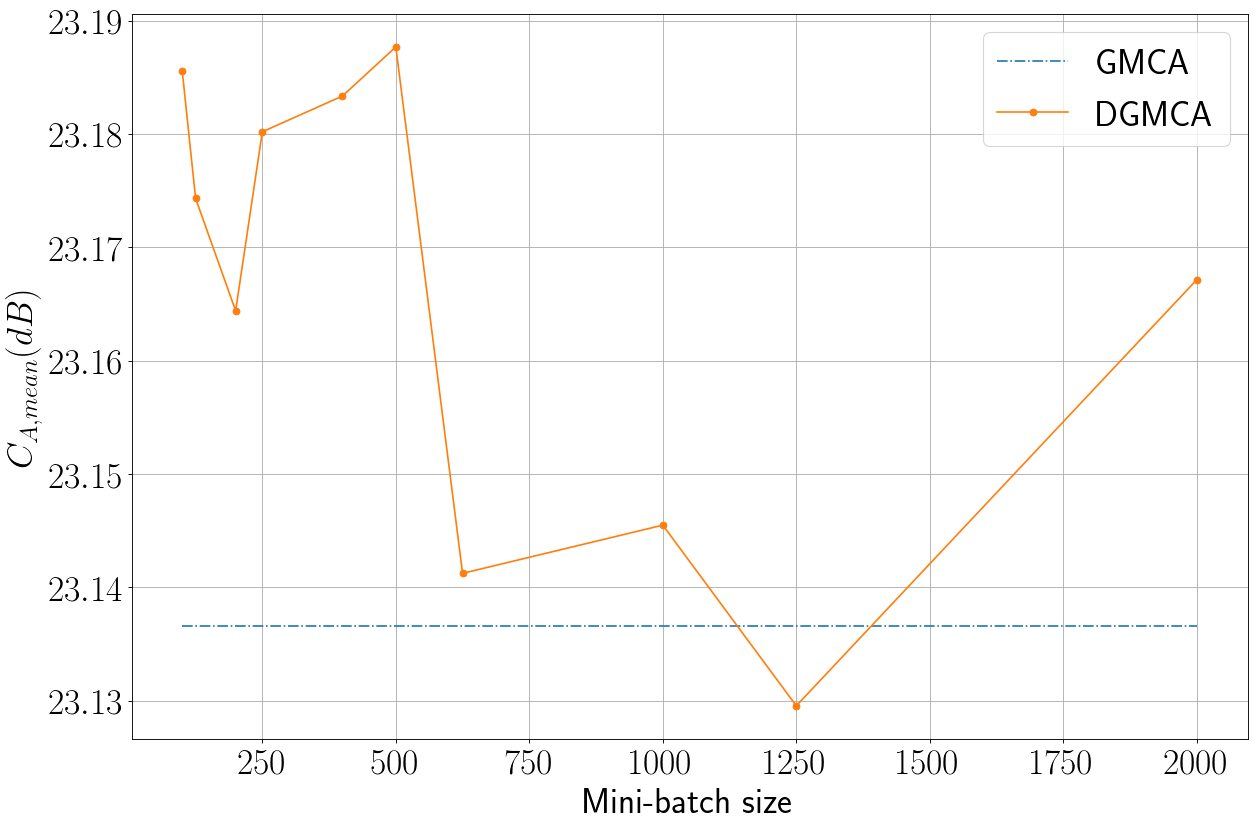

In [73]:
# Use the mean or the median over the CA 
type_ca = 0# 0 = CA_mean // 1 = CA_median

matplotlib.rcParams.update({'font.size': 32}) # 23
fig=plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.rc('text', usetex=True)

plt.plot(divisors[0:10], log_imp_CA_GMCA[type_ca]*np.ones(len(divisors[0:10])), '-.', label=r'GMCA')
plt.plot(divisors[0:10], log_imp_CA_DGMCA[type_ca,0:10], '-o', label=r'DGMCA')

plt.xlabel('Mini-batch size')
if type_ca == 0:
    plt.ylabel(r'$C_{A,mean}(dB)$')
elif type_ca == 1:
    plt.ylabel(r'$C_{A,med}(dB)$')
plt.grid()
plt.legend()
plt.show()

title_str_pdf = plots_path + title_str + ".pdf"
fig.savefig(title_str_pdf, bbox_inches='tight')

In [70]:
divisors

array([  100,   125,   200,   250,   400,   500,   625,  1000,  1250,
        2000,  2500,  5000, 10000])

In [47]:
totalSize = 10000 # Number of samples for each observation/source

# For the batch sizes: Use all the divisors of totalSize bigger than minSizeBlock
# Or you can define the list manually by changing the array: divisors
minSizeBlock = 100
divisors = list(divisorGenerator(totalSize))
divisors = np.array(divisors)
divisors = divisors[divisors>=minSizeBlock]

In [48]:
divisors

array([  100,   125,   200,   250,   400,   500,   625,  1000,  1250,
        2000,  2500,  5000, 10000])

In [ ]:
divisors: [ 100  200  250  400  500  625 1000 1250 2500]